In [ ]:
# Avocado Project
# Samrat Dey
# Batch - DS2312

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/Dey-Samrat/Evaluation-Projects/main/avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


The dataset contains retail scan data for National Retail Volume (units) and price, which contains both numerical ad categorical data. Here, in the first case, 'AveragePrice' is the target variable which contains continuous data, so it will be a 'Regression Problem' where we need to predict the average price. In the second case, 'region' is the target variable which contains categorical data, so it will be a 'Classification Problem' where we need to predict the region.

In [4]:
df.shape

(18249, 14)

The dataset contains 18249 rows and 14 columns, out of which 1 column is taraget variable and the remaining 13 columns are independent variables

In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
df.columns.tolist()

['Unnamed: 0',
 'Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

In [7]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

There are three different types of data (int64, float64 and object) present in the dataset

In [8]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


<Axes: >

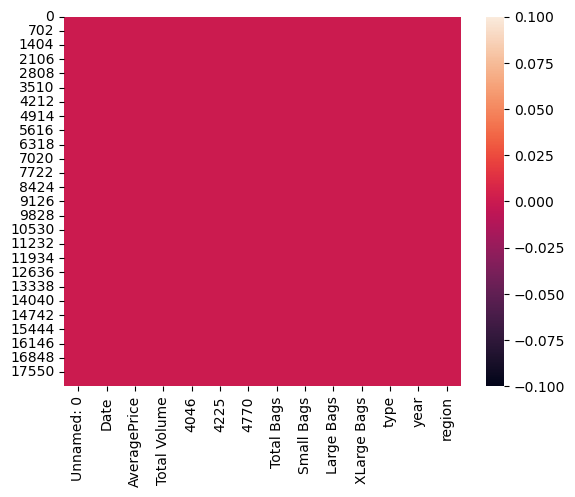

In [10]:
sns.heatmap(df.isnull())

In [11]:
# Checking nmber of unique values in each column
df.nunique().to_frame("No. of Unique values")

,No. of Unique values
Unnamed: 0,53
Date,169
AveragePrice,259
Total Volume,18237
4046,17702
4225,18103
4770,12071
Total Bags,18097
Small Bags,17321
Large Bags,15082


In [23]:
# Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,51.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,1,50.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,2,49.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,3,48.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,4,47.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,161.0,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0
18245,8,160.0,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0
18246,9,159.0,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0
18247,10,158.0,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0


In [24]:
# Statistical summary of numerical columns
df.describe()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,24.232232,83.997096,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,15.481045,48.787638,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.000000,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,10.000000,42.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,24.000000,84.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,38.000000,126.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,52.000000,168.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


1. The counts of all the columns are same which means there are no missing values in the dataset
2. The mean value is greater than the median(50%) in all the columns which means the data is skewed to right in all the columns
3. By summerizing the data we can observe that there are difference between 75% and max in all the columns, hence there are outliers present in the data

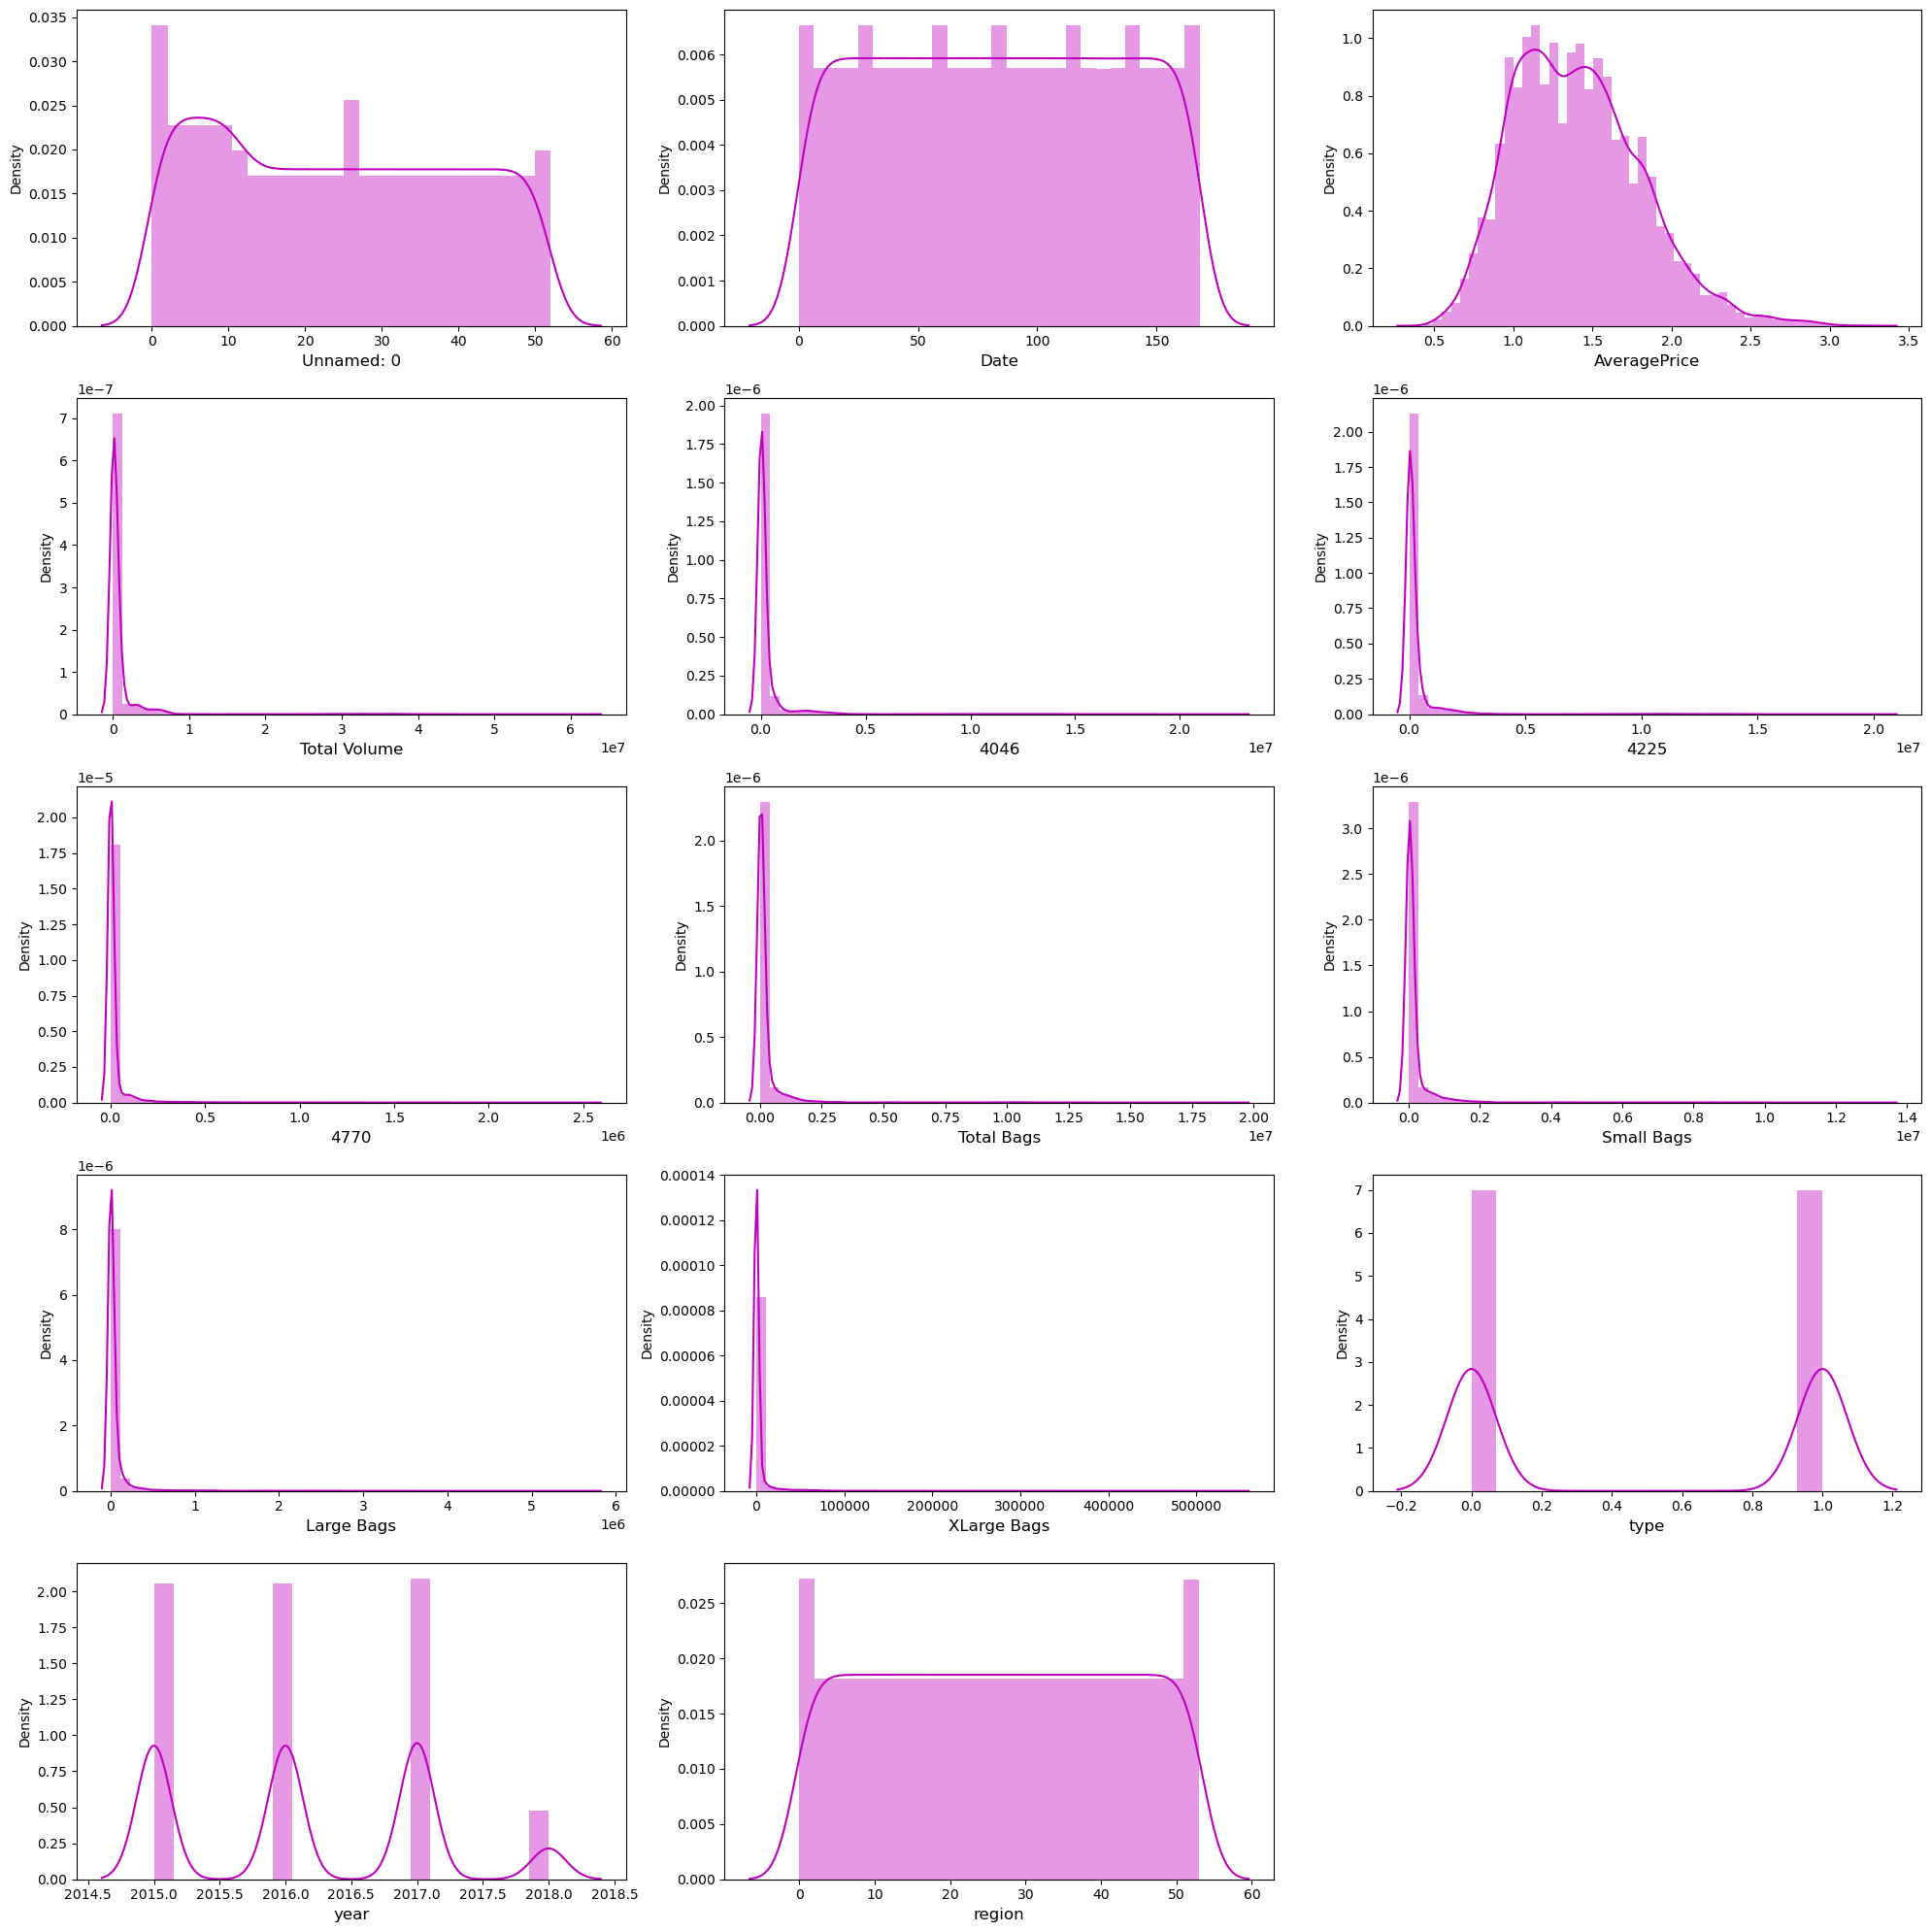

In [25]:
plt.figure(figsize=(20,20),facecolor="white")
plotnumber=1
for col in df:
    if plotnumber<=14:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[col],color="m")
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

## First Case: To find average price

In [26]:
y=df['AveragePrice']
x=df.drop(columns=['AveragePrice'])

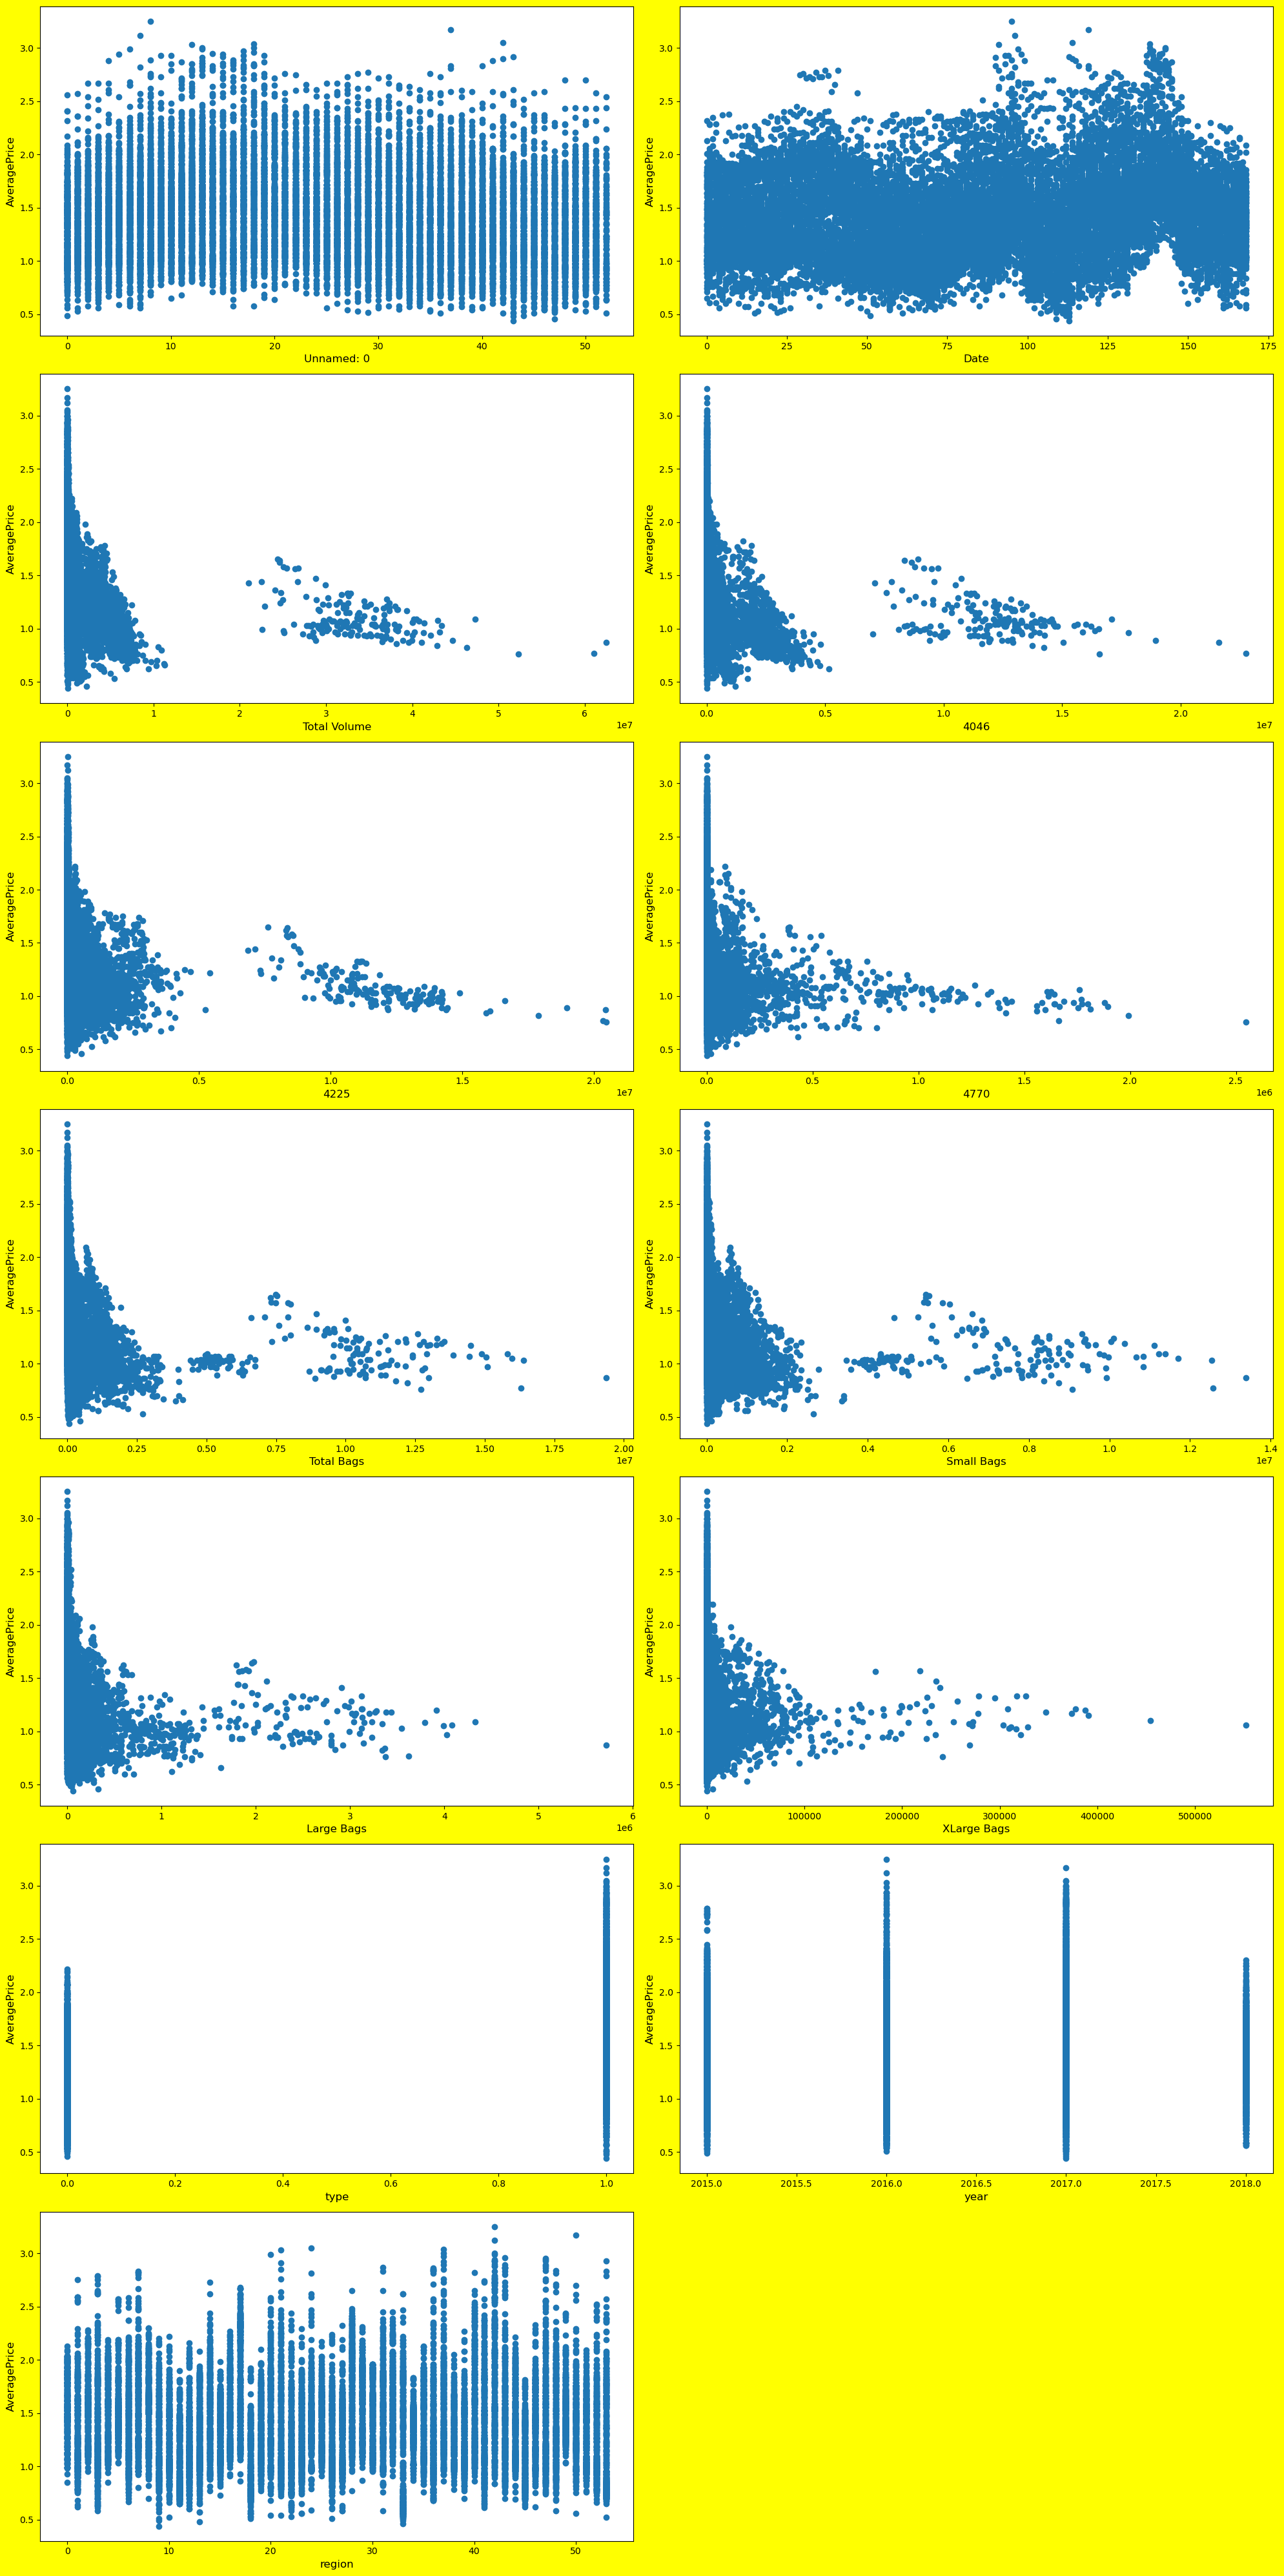

In [27]:
plt.figure(figsize=(20,40),facecolor="Yellow")
plotnumber=1
for col in x:
    if plotnumber<=14:
        ax=plt.subplot(7,2,plotnumber)
        plt.scatter(x[col],y)
        plt.xlabel(col,fontsize=12)
        plt.ylabel('AveragePrice', fontsize=12)
    plotnumber+=1
plt.tight_layout()

As all the features shows a positive trend, it means all the features are important in building the model. The relationship between dependent and independent variables look fairly linear. Thus, our linearly assumption satisfied.

In [28]:
# Data Scaling
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.5653269 , -0.67635986, -0.22771641, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       [-1.50073001, -0.69685742, -0.23042664, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       [-1.43613312, -0.71735497, -0.21208462, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       ...,
       [-0.98395486,  1.53737632, -0.24233073, ...,  1.00016441,
         1.97050371,  1.70081131],
       [-0.91935797,  1.51687877, -0.24162464, ...,  1.00016441,
         1.97050371,  1.70081131],
       [-0.85476108,  1.49638121, -0.24125273, ...,  1.00016441,
         1.97050371,  1.70081131]])

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=300)
y_train.head()

14846    1.81
1115     1.03
189      1.06
6311     0.99
1920     1.09
Name: AveragePrice, dtype: float64

In [30]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [31]:
# Before testing the model we'll try to predict on one sample
df.tail(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18247,10,158.0,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0
18248,11,157.0,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1.0,2018,53.0


In [34]:
print('Predicted Average Price is:',regression.predict(scaler.transform([[10,158.0,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0]])))

Predicted Average Price is: [1.58580828]


Predicted average price is 1.58580828, but actual average price is 1.93

In [35]:
# Save the model before using it for prediction
pickle.dump(regression,open('reg_model','wb'))

In [36]:
# Prediction using the saved model
loaded_model=pickle.load(open('reg_model','rb'))
a=loaded_model.predict(scaler.transform([[11,157.0,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1.0,2018,53.0]]))
a

array([1.58172423])

Predicted average price is 1.58172423, but actual average price is 1.62

In [37]:
# Predict the model on test data
x_test[1]
y_pred=regression.predict(x_test)
y_pred

array([1.69364376, 1.11217063, 1.24336065, ..., 0.91373747, 1.60417979,
       1.14885118])

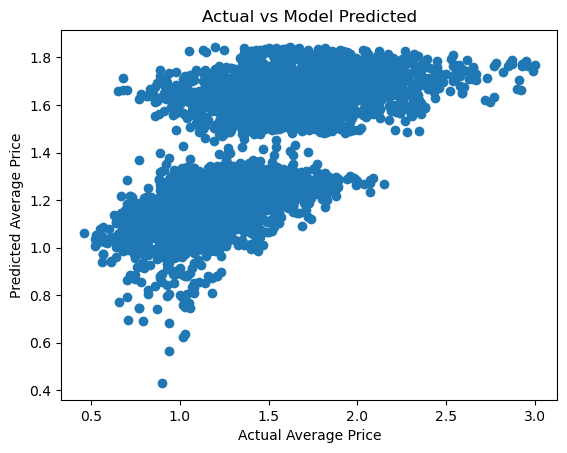

In [39]:
# Compare predicted label and actual label using visualization
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.title('Actual vs Model Predicted')
plt.show()

## Second Case: To find the region

In [40]:
# Separating features and label
y=df['region']
x=df.drop(columns=['region'])

In [41]:
# Feature scaling using standard scalarization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-1.565327,-0.676360,-0.188689,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,-0.999836,-1.221282
1,-1.500730,-0.696857,-0.139020,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,-0.999836,-1.221282
2,-1.436133,-0.717355,-1.182069,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,-0.999836,-1.221282
3,-1.371536,-0.737853,-0.809551,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,-0.999836,-1.221282
4,-1.306939,-0.758350,-0.312861,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,-0.999836,-1.221282
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,-1.113149,1.578371,0.556347,-0.241373,-0.230017,-0.243857,-0.212540,-0.229301,-0.226665,-0.220964,-0.17558,1.000164,1.970504
18245,-1.048552,1.557874,0.755023,-0.242296,-0.230693,-0.242277,-0.212540,-0.233594,-0.232196,-0.221403,-0.17558,1.000164,1.970504
18246,-0.983955,1.537376,1.152375,-0.242331,-0.230693,-0.243090,-0.205766,-0.233463,-0.231644,-0.222561,-0.17558,1.000164,1.970504
18247,-0.919358,1.516879,1.301382,-0.241625,-0.230428,-0.242651,-0.205774,-0.231866,-0.229543,-0.222529,-0.17558,1.000164,1.970504


In [42]:
# Checking Variance Inflation Factor in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,3.470484e+00,Unnamed: 0
1,3.593196e+01,Date
2,1.794330e+00,AveragePrice
3,4.928244e+09,Total Volume
4,6.611986e+08,4046
5,5.991008e+08,4225
6,4.771974e+06,4770
7,2.370316e+14,Total Bags
8,1.364727e+14,Small Bags
9,1.450435e+13,Large Bags


In [43]:
y.value_counts()

0.0     338
40.0    338
29.0    338
30.0    338
31.0    338
32.0    338
33.0    338
34.0    338
35.0    338
36.0    338
37.0    338
38.0    338
39.0    338
41.0    338
1.0     338
42.0    338
43.0    338
44.0    338
45.0    338
46.0    338
47.0    338
48.0    338
49.0    338
50.0    338
51.0    338
52.0    338
28.0    338
27.0    338
26.0    338
25.0    338
2.0     338
3.0     338
4.0     338
5.0     338
6.0     338
7.0     338
8.0     338
9.0     338
10.0    338
11.0    338
12.0    338
13.0    338
14.0    338
15.0    338
16.0    338
17.0    338
18.0    338
19.0    338
20.0    338
21.0    338
22.0    338
23.0    338
24.0    338
53.0    335
Name: region, dtype: int64

Here the data is not balanced. Since it is a classification problem, we will balance the data using over sampling method

In [44]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [45]:
y1.value_counts()

0.0     338
40.0    338
29.0    338
30.0    338
31.0    338
32.0    338
33.0    338
34.0    338
35.0    338
36.0    338
37.0    338
38.0    338
39.0    338
41.0    338
1.0     338
42.0    338
43.0    338
44.0    338
45.0    338
46.0    338
47.0    338
48.0    338
49.0    338
50.0    338
51.0    338
52.0    338
28.0    338
27.0    338
26.0    338
25.0    338
2.0     338
3.0     338
4.0     338
5.0     338
6.0     338
7.0     338
8.0     338
9.0     338
10.0    338
11.0    338
12.0    338
13.0    338
14.0    338
15.0    338
16.0    338
17.0    338
18.0    338
19.0    338
20.0    338
21.0    338
22.0    338
23.0    338
24.0    338
53.0    338
Name: region, dtype: int64

In [73]:
# Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxaccu=0
maxrs=0
for i in range (1,100):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.10,random_state=1)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print("Best Accuracy is",maxaccu,"at random_state",maxrs)

KeyboardInterrupt: 

In [54]:
# Classification Algorithms
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [55]:
# Checking accuracy for Random Forest Classifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9233296823658269
[[21  0  0 ...  0  0  0]
 [ 0 35  0 ...  0  0  1]
 [ 0  0 38 ...  0  0  0]
 ...
 [ 0  0  0 ... 36  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  1 ...  0  0 31]]
              precision    recall  f1-score   support

         0.0       0.81      0.95      0.88        22
         1.0       0.97      0.95      0.96        37
         2.0       0.97      0.97      0.97        39
         3.0       0.89      0.94      0.92        35
         4.0       0.93      1.00      0.96        37
         5.0       0.83      0.83      0.83        29
         6.0       0.97      1.00      0.99        37
         7.0       0.97      0.88      0.92        33
         8.0       0.98      0.95      0.97        44
         9.0       0.86      0.89      0.88        36
        10.0       0.87      0.92      0.89        36
        11.0       1.00      0.94      0.97        36
        12.0       0.97      0.97      0.97        36
        13.0       0.92      0.94      0.93        36
        14.0  

The accuracy for this model is 92.33%

In [56]:
# Checking accuracy for Logistic Regression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.3488499452354874
[[11  0  0 ...  0  0  0]
 [ 1 11  0 ...  0  0  0]
 [ 0  0 19 ...  0  0  1]
 ...
 [ 0  0  0 ... 34  0  0]
 [ 0  0  0 ...  0 16  0]
 [ 0  0  0 ...  0  0  8]]
              precision    recall  f1-score   support

         0.0       0.14      0.50      0.22        22
         1.0       0.33      0.30      0.31        37
         2.0       0.59      0.49      0.54        39
         3.0       0.17      0.37      0.24        35
         4.0       0.67      0.32      0.44        37
         5.0       0.42      0.17      0.24        29
         6.0       0.79      0.62      0.70        37
         7.0       0.24      0.27      0.25        33
         8.0       0.36      0.52      0.43        44
         9.0       0.24      0.22      0.23        36
        10.0       0.27      0.08      0.13        36
        11.0       0.26      0.36      0.30        36
        12.0       0.44      0.44      0.44        36
        13.0       0.52      0.39      0.44        36
        14.0  

The accuracy score using Logistic Regression is 34.88%

In [57]:
# Checking accuracy for Gradient Boosting Classifier
GB=LogisticRegression()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.3488499452354874
[[11  0  0 ...  0  0  0]
 [ 1 11  0 ...  0  0  0]
 [ 0  0 19 ...  0  0  1]
 ...
 [ 0  0  0 ... 34  0  0]
 [ 0  0  0 ...  0 16  0]
 [ 0  0  0 ...  0  0  8]]
              precision    recall  f1-score   support

         0.0       0.14      0.50      0.22        22
         1.0       0.33      0.30      0.31        37
         2.0       0.59      0.49      0.54        39
         3.0       0.17      0.37      0.24        35
         4.0       0.67      0.32      0.44        37
         5.0       0.42      0.17      0.24        29
         6.0       0.79      0.62      0.70        37
         7.0       0.24      0.27      0.25        33
         8.0       0.36      0.52      0.43        44
         9.0       0.24      0.22      0.23        36
        10.0       0.27      0.08      0.13        36
        11.0       0.26      0.36      0.30        36
        12.0       0.44      0.44      0.44        36
        13.0       0.52      0.39      0.44        36
        14.0  

The accuracy for this model is 34.88%

In [58]:
# Checking accuracy for Support Vector Machine Classifier
SVC=SVC()
SVC.fit(x_train,y_train)
predSVC=SVC.predict(x_test)
print(accuracy_score(y_test,predSVC))
print(confusion_matrix(y_test,predSVC))
print(classification_report(y_test,predSVC))

0.2420591456736035
[[ 5  0  1 ...  0  0  0]
 [ 3  6  0 ...  0  0  3]
 [ 0  0  9 ...  0  0  0]
 ...
 [ 0  0  0 ... 33  1  0]
 [ 0  0  0 ...  1  9  0]
 [ 2  1  0 ...  0  0  7]]
              precision    recall  f1-score   support

         0.0       0.04      0.23      0.07        22
         1.0       0.35      0.16      0.22        37
         2.0       0.27      0.23      0.25        39
         3.0       0.00      0.00      0.00        35
         4.0       0.08      0.11      0.09        37
         5.0       0.06      0.17      0.09        29
         6.0       1.00      0.51      0.68        37
         7.0       0.08      0.03      0.04        33
         8.0       1.00      0.50      0.67        44
         9.0       0.55      0.17      0.26        36
        10.0       0.06      0.06      0.06        36
        11.0       0.19      0.28      0.23        36
        12.0       0.88      0.42      0.57        36
        13.0       0.80      0.22      0.35        36
        14.0  

The accuracy for this model is 24.20%

In [59]:
# Checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.09255202628696604
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  1  0  0]
 ...
 [ 0  0  0 ... 27  0  0]
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  5  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.00      0.00      0.00        37
         2.0       0.00      0.00      0.00        39
         3.0       0.00      0.00      0.00        35
         4.0       0.21      0.22      0.21        37
         5.0       0.00      0.00      0.00        29
         6.0       0.00      0.00      0.00        37
         7.0       0.00      0.00      0.00        33
         8.0       0.00      0.00      0.00        44
         9.0       0.00      0.00      0.00        36
        10.0       0.00      0.00      0.00        36
        11.0       0.16      0.56      0.24        36
        12.0       0.00      0.00      0.00        36
        13.0       0.00      0.00      0.00        36
        14.0 

The accuracy for this model is 9.25%

In [60]:
# Checking accuracy for Bagging Classifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8833515881708652
[[21  0  0 ...  0  0  0]
 [ 0 34  0 ...  0  0  0]
 [ 0  0 39 ...  0  0  0]
 ...
 [ 0  0  0 ... 36  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0  0 27]]
              precision    recall  f1-score   support

         0.0       0.72      0.95      0.82        22
         1.0       0.92      0.92      0.92        37
         2.0       0.89      1.00      0.94        39
         3.0       0.84      0.89      0.86        35
         4.0       0.92      0.95      0.93        37
         5.0       0.88      0.79      0.84        29
         6.0       0.97      1.00      0.99        37
         7.0       0.91      0.91      0.91        33
         8.0       0.98      1.00      0.99        44
         9.0       0.92      0.94      0.93        36
        10.0       0.77      0.92      0.84        36
        11.0       0.94      0.86      0.90        36
        12.0       0.97      0.92      0.94        36
        13.0       0.94      0.86      0.90        36
        14.0  

The accuracy for this model is 88.34%

In [61]:
# Checking accuracy for ExtraTrees Classifier
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
predETC=ETC.predict(x_test)
print(accuracy_score(y_test,predETC))
print(confusion_matrix(y_test,predETC))
print(classification_report(y_test,predETC))

0.9249726177437021
[[21  0  0 ...  0  0  0]
 [ 0 33  0 ...  0  0  1]
 [ 0  0 38 ...  0  0  0]
 ...
 [ 0  0  0 ... 36  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0  0 33]]
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91        22
         1.0       0.92      0.89      0.90        37
         2.0       1.00      0.97      0.99        39
         3.0       0.92      0.97      0.94        35
         4.0       0.97      1.00      0.99        37
         5.0       0.92      0.79      0.85        29
         6.0       0.97      1.00      0.99        37
         7.0       0.93      0.85      0.89        33
         8.0       1.00      0.98      0.99        44
         9.0       0.80      0.89      0.84        36
        10.0       0.79      0.83      0.81        36
        11.0       0.94      0.94      0.94        36
        12.0       0.92      0.92      0.92        36
        13.0       0.94      0.83      0.88        36
        14.0  

The accuracy for this model is 92.49%

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
# Checking cv score for a Random Forest Classifier
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predRFC)-score.mean())

[0.63325116 0.82415776 0.77835616 0.70547945 0.50356164]
0.6889612378669007
Differrence between accuracy score and cross validation score is 0.23436844449892624


In [64]:
# Checking cv score for a Logistic Regression
score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predLR)-score.mean())

[0.37606135 0.48972884 0.32684932 0.11041096 0.06849315]
0.2743087238249607
Differrence between accuracy score and cross validation score is 0.07454122141052671


In [65]:
# Checking cv score for a Gradient Boosting Classifier
score=cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predGB)-score.mean())

[0.37606135 0.48972884 0.32684932 0.11041096 0.06849315]
0.2743087238249607
Differrence between accuracy score and cross validation score is 0.07454122141052671


In [66]:
# Checking cv score for a SVM Classifier
score=cross_val_score(SVC,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predSVC)-score.mean())

[0.24541222 0.36483155 0.21671233 0.07561644 0.04328767]
0.18917204143732436
Differrence between accuracy score and cross validation score is 0.05288710423627915


In [67]:
# Checking cv score for a AdaBoost Classifier
score=cross_val_score(ABC,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predABC)-score.mean())

[0.03697617 0.04765818 0.07863014 0.05287671 0.03917808]
0.051063855652232634
Differrence between accuracy score and cross validation score is 0.04148817063473341


In [68]:
# Checking cv score for a Bagging Classifier
score=cross_val_score(BC,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predBC)-score.mean())

[0.55902492 0.76225692 0.72328767 0.63041096 0.45534247]
0.6260645872964059
Differrence between accuracy score and cross validation score is 0.2572870008744593


In [69]:
# Checking cv score for a ExtrTrees Classifier
score=cross_val_score(ETC,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predETC)-score.mean())

[0.66694056 0.80498494 0.78054795 0.67315068 0.45616438]
0.6763577027123363
Differrence between accuracy score and cross validation score is 0.2486149150313658


AdaBoost Classifier is our best model as the difference between accuracy score and cross validation score is least